## Introduction to Hierarchical Clustering for Event Data

#### Section I: 
How to implement three common clustering algorithms (Kmeans,DBSCAN, and Agglomertive Hirerarchical clustering) in python

In this section we demonstrate characteristics of three common clustering algorithms on toy datasets. Human eyes are really good at clusetring 2D data, so this exercise would allow one to get an intuition on 

    1- how each clustering algorithm works
    2- how to tune clustering parameters to improve clustering accuracy
    3- compare performance of different clustering algorithms for given datasets  

More clustering examples on the toy datasets can be found in the link below. As much as this examples are interesting, they are still in 2D and so the intuition might not apply to very high dimensional data!

To run each cell of the notebook you can click on the cell to select it, then press (SHIFT+ENTER) , or (CTRL+ENTER), or press the play button in the toolbar above. 

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py


Load required libraries for generating toy dataset and plotting them

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cluster, datasets 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Generate datasets. We choose the size big enough to see the scalability of the algorithms, but not too big to avoid too long running times

In [2]:
n_samples = 1500

blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

no_structure = np.random.rand(n_samples, 2), None

Plot datasets

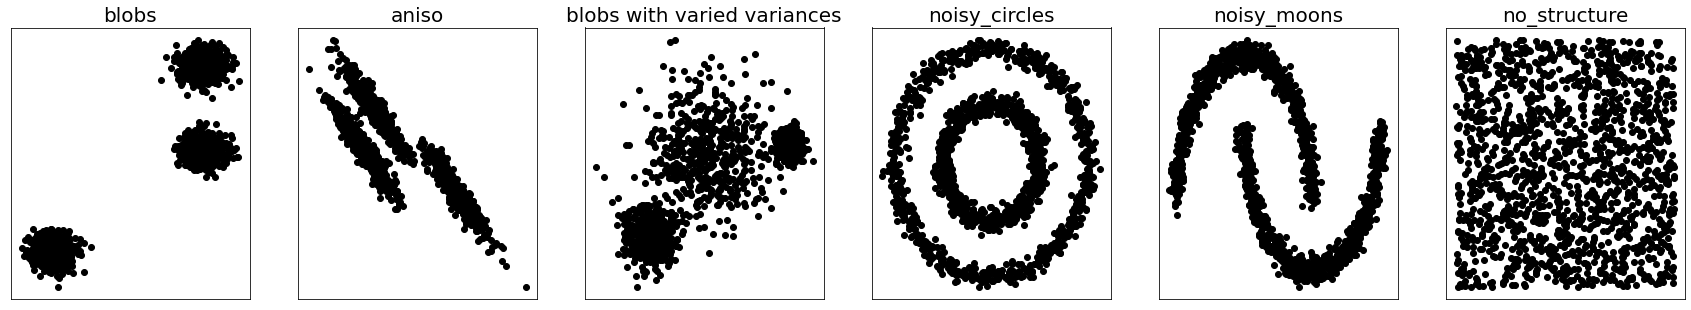

In [3]:
dataset_names=['blobs','aniso','blobs with varied variances','noisy_circles','noisy_moons','no_structure']
dataset_list = [
                blobs,
                aniso,
                varied,
                noisy_circles,
                noisy_moons,
                no_structure
                ]
plt.figure(figsize=(30,5))
for i,dataset in enumerate(dataset_list):
    i+=1
    X=dataset[0]
    plt.subplot(1,len(dataset_list),i) 
    plt.scatter(X[:, 0], X[:, 1],c='black')
    plt.title(str(dataset_names[i-1]),fontsize=20)
    plt.xticks(())
    plt.yticks(())
plt.show()

## K-means clustering

#### steps of K-means clustering algorithm
    1- specify the number of clusters (K) to assign.
    2- randomly initiate k centroids
    3- repeat:
        4- assing each point to its closest cetroid
        5- calculate the new centroid of each cluster
    6- until the centroid positions do not change
    
main hyperparameter: number k of clusters

In [4]:
# import required modules for Kmeans clustering 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

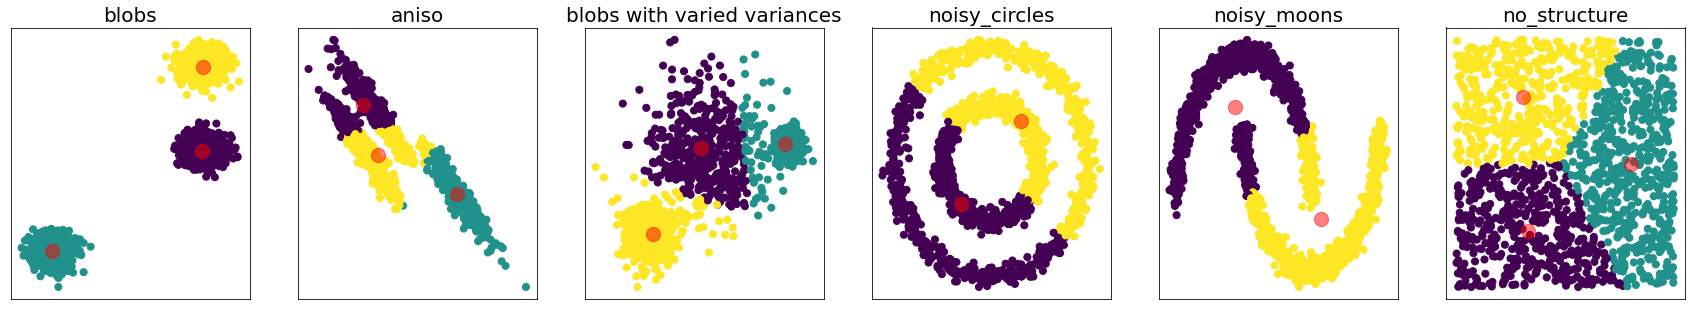

In [5]:
# initialize clustering parameters
datasets_list = [
    (blobs, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

default_base = {'n_clusters': 3}

plt.figure(figsize=(30,5))
for i_dataset, (dataset, algo_params) in enumerate(datasets_list):
    params = default_base.copy()
    params.update(algo_params)
    
    X,y=dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    # Create cluster objects
    kmeans = KMeans(n_clusters=algo_params['n_clusters'],
                    init="random",
                    n_init=10,
                    max_iter=300,
                    random_state=42
                    )
    # Train clustering model
    kmeans.fit(X)
    centroids=kmeans.cluster_centers_[:, 1]
    # Plot dataset and its cluater centroids 
    plt.subplot(1,len(dataset_list),i_dataset+1) 
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], centroids, c='red', s=200, alpha=0.5)
    plt.title(str(dataset_names[i_dataset]),fontsize=20)
    plt.xticks(())
    plt.yticks(())
plt.show()


##### Observations:
    1- k-means is fast and simple
    2- the result depends on starting guesses (k, initial states of centroids)
    2- is limited to linear clustering boundaries
    3- performs well on clusters with Gaussian distribution, but faild if clusters have complex geometries!

## Aglomerative Hierarchical clustering

#### - Agglomerative clustering is the bottom-up approach. 
    It starts by considering each datapoint as a single cluster. Then merges the two points(single clusters) that are the most similar until all points have been merged into a single cluster.

#### - Divisive clustering is the top-down approach.
    It starts with all points as one giant cluster and splits the least similar clusters at each step until only single data points remain.

Both approaches generate a cluster tree (dendogram) that shows the hierachical relationship between similar sets of data.

The main hyperparameters here are linkage_method, and distance/similarity threshold


In [6]:
# import required modules for AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

Comparing characteristics of different linkage methods for Agglomerative hierarchical clustering on 2D datasets :

 linkage method :  single


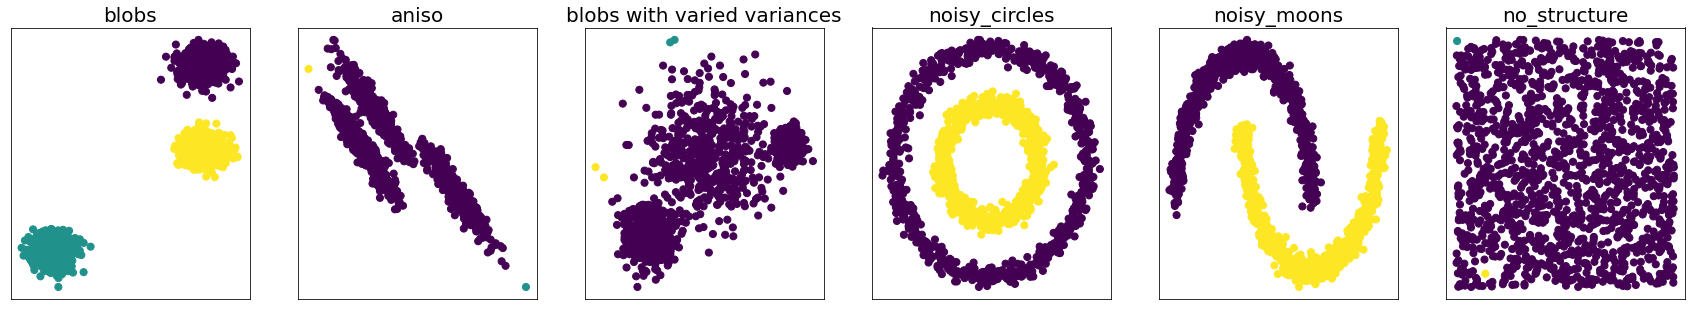


 linkage method :  complete


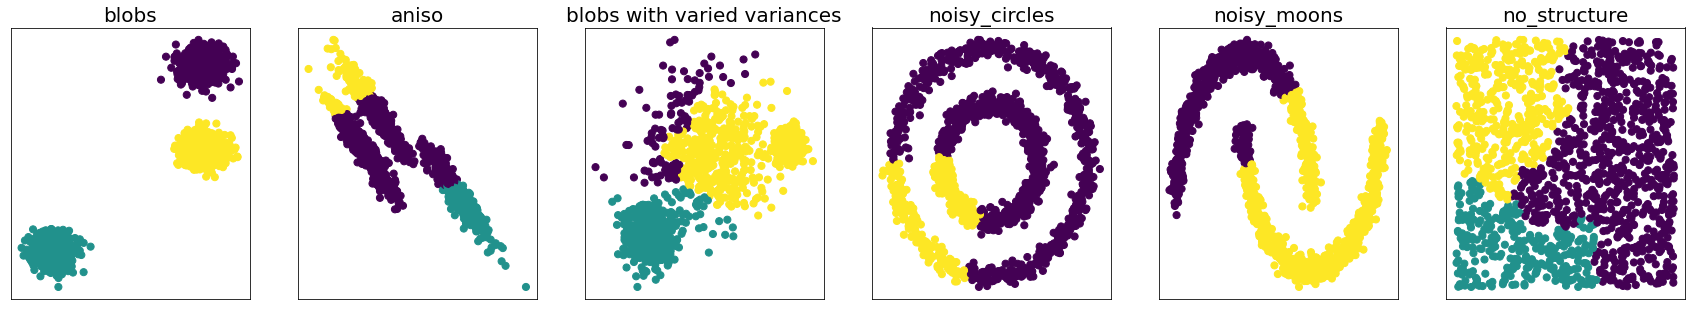


 linkage method :  average


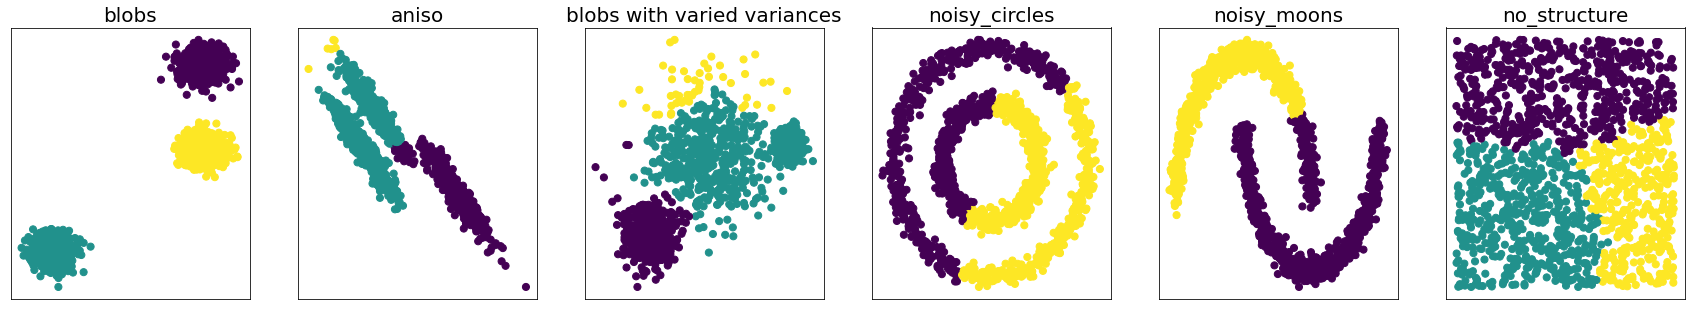


 linkage method :  ward


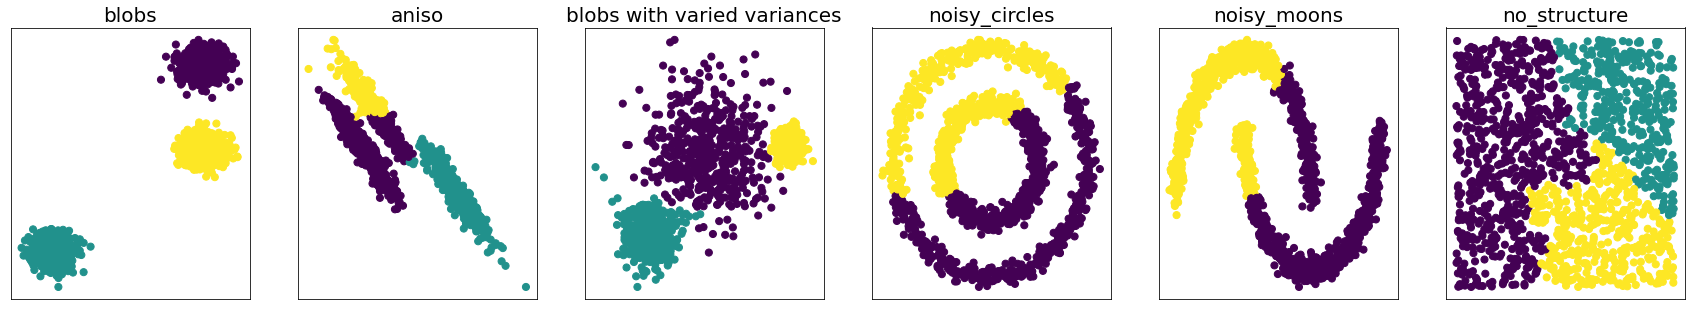

In [7]:
print ('Comparing characteristics of different linkage methods for Agglomerative hierarchical clustering on 2D datasets :')
# initialize clustering parameters
datasets_list = [
    (blobs, {'n_clusters': 3}),
    (aniso, {'n_neighbors': 3}),
    (varied, {'n_neighbors': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

for i_linkage,linkage in enumerate(['single','complete','average','ward']):
    
    print('\n linkage method : ', linkage)
    plt.figure(figsize=(30,5))
    
    for i_dataset, (dataset, algo_params) in enumerate(datasets_list):
        # update parameters with dataset-specific values
        params = default_base.copy()
        params.update(algo_params)

        X,y=dataset

        # normalize dataset for easier parameter selection
        X = StandardScaler().fit_transform(X)

        # Create cluster objects
        algorithm = AgglomerativeClustering(
                        n_clusters=params['n_clusters'], linkage=linkage)

        # Train clustering model
        algorithm.fit(X)
        y_pred = algorithm.labels_.astype(int)
        # Plot dataset and its cluater centroids 
        plt.subplot(1,len(dataset_list),i_dataset+1) 
        plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
        plt.title(str(dataset_names[i_dataset]),fontsize=20)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    


Visualize dendogram of hierarchical clustering


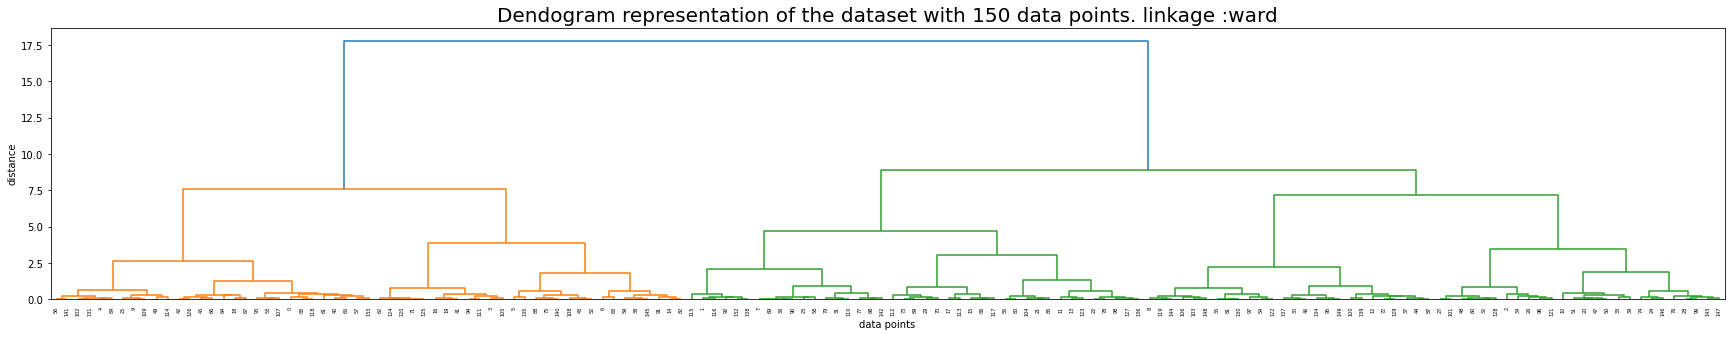

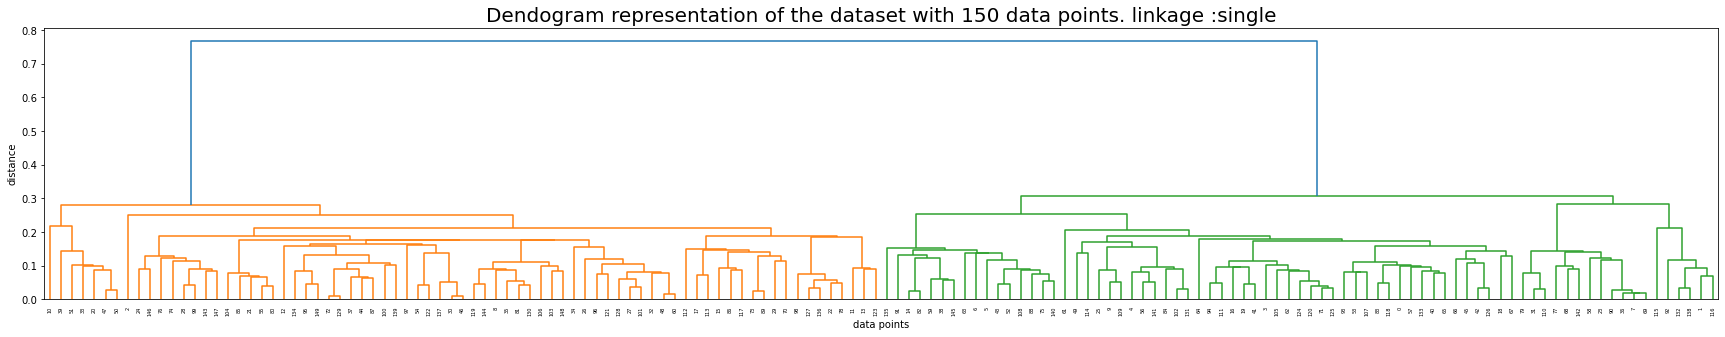

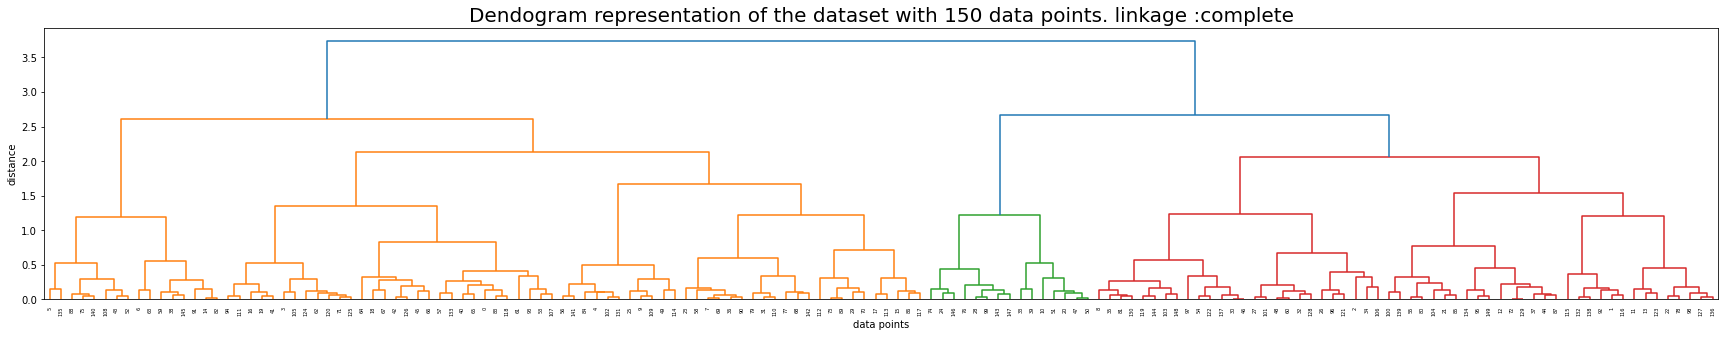

In [8]:
print ('Visualize dendogram of hierarchical clustering')
from scipy.cluster.hierarchy import dendrogram, linkage

X = StandardScaler().fit_transform(datasets.make_moons(n_samples=150, noise=.05)[0])
for linkage_method in ['ward','single','complete']:
    metric='euclidean'
    Z = linkage(X, method=linkage_method,metric=metric)
    plt.figure(figsize=(30,5))
    dendrogram(Z) 
    plt.title('Dendogram representation of the dataset with 150 data points. linkage :'+linkage_method,fontsize=20)
    plt.ylabel('distance')
    plt.xlabel('data points')
    plt.show()

#### The main observations to make are:

single linkage is fast, and can perform well on non-globular data, but it performs poorly in the presence of noise.

average and complete linkage perform well on cleanly separated globular clusters, but have mixed results otherwise.

Ward is the most effective method for noisy data.



## Density based clustering

### DBSCAN groups together closely-packed points. 

- We don’t need to specify the number of clusters
- Flexibility in the shapes & sizes of clusters
- Able to deal with noise and outliers
- Border may be arbitrarily classified - not an issue for most datasets
- Faces difficulty finding clusters of varying densities 

There are two inputs to DBSCAN:
- esp: the search distance around point, and
- minpts: the minimum number of points required to form a density cluster


In [9]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

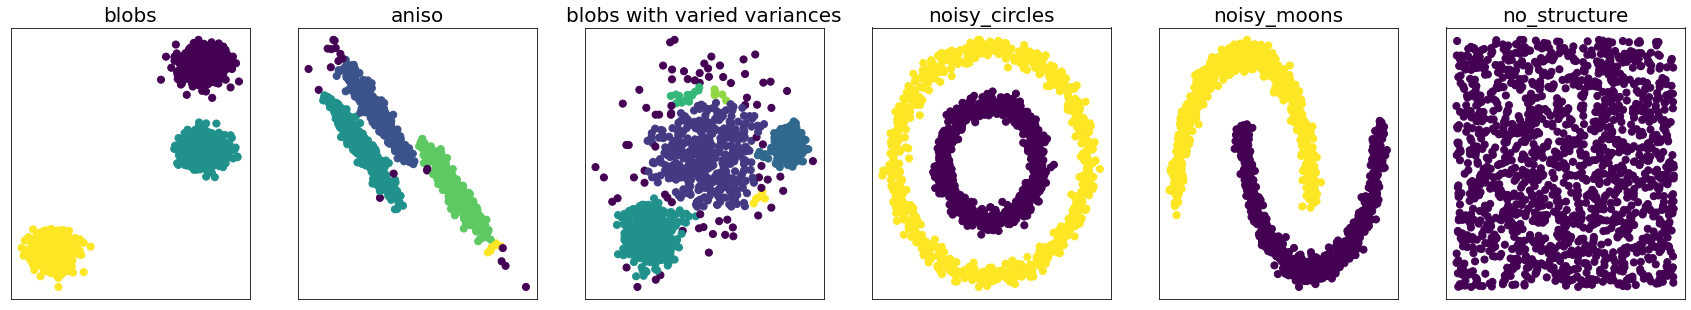

In [10]:
datasets_list = [
    (blobs, {}),
    (aniso, {'eps': .15}),
    (varied, {'eps': .15}),
    (noisy_circles, {}),
    (noisy_moons, {}),
    (no_structure, {})]

default_base = {'eps': .3}

plt.figure(figsize=(30,5))
for i_dataset, (dataset, algo_params) in enumerate(datasets_list):
    params = default_base.copy()
    params.update(algo_params)
    
    X,y=dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    # Create cluster objects
    dbscan = cluster.DBSCAN(eps=params['eps'])
    
    # Train clustering model
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(int)
    
    plt.subplot(1,len(dataset_list),i_dataset+1) 
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
    plt.title(str(dataset_names[i_dataset]),fontsize=20)
    plt.xticks(())
    plt.yticks(())
plt.show()


## Hierarchical Clustering of event data

In [11]:
import pickle
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
from fastcluster import linkage as linkage2
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import squareform


In [12]:
# load the sample event data to be clusterd
events=pd.read_csv('example/event_data.csv')
print(events[['Node','Event_Type','Pattern','inc_id']].nunique())
events

Node           845
Event_Type     725
Pattern       1519
inc_id         266
dtype: int64


,t,Node,Event_Type,inc_id,Pattern
0,2021-01-26 00:00:02,node3386,product92-hur files stuck product51,NaN,node3386__product92-hur files stuck product51
1,2021-01-26 00:00:02,node3386,product92-hur files stuck product51,NaN,node3386__product92-hur files stuck product51
2,2021-01-26 00:00:03,node967,product117_file_monitor,NaN,node967__product117_file_monitor
3,2021-01-26 00:00:03,node713,product117_file_monitor,NaN,node713__product117_file_monitor
4,2021-01-26 00:00:04,node1433,etype3 indicator on report_file_out,NaN,node1433__etype3 indicator on report_file_out
...,...,...,...,...,...
7366,2021-01-26 23:59:17,node46,te1/0/11,NaN,node46__te1/0/11
7367,2021-01-26 23:59:17,node3759.company.com,gi2/0/20,NaN,node3759.company.com__gi2/0/20
7368,2021-01-26 23:59:17,node4550.company.com,rrgmultipleprimary,NaN,node4550.company.com__rrgmultipleprimary
7369,2021-01-26 23:59:26,node2179.company.com,spg,NaN,node2179.company.com__spg


In [13]:
# load time series database of the historical data
pattern_ts=pd.read_csv('example/pattern_timeseries.csv')
# load representational memory (pattern distance matrix) 
dm=pd.read_csv('example/pattern_dm.csv')

In [14]:
# Train a clustring model using representational memory of pattren dimension

# select span window to group events of the sample dataset
t_range=['2021-01-26 06:00:01','2021-01-26 18:00:01']
test=events[(events['t'] >= t_range[0]) & (events['t'] < t_range[1])]

# define clustering parameters
level='Pattern'
linkage_method='complete'
criterion='distance'
d=0.7
dm=[dm.values,dm.columns]
# retrieve pairwise distance values bewteen the pattern time series of the test dataset
u_values = test[level].unique()
overlap_values = list(set(u_values) & set(dm[1]))
if len(overlap_values) >= 2:
    overlap_values_index = list(np.in1d(list(dm[1]), overlap_values).nonzero()[0])
    reordered_overlap_values = np.array(dm[1])[overlap_values_index] 
else:
    print("representational memory canot provide enough information to train the model for the given span window")
sub_dm = dm[0][np.ix_(overlap_values_index, overlap_values_index)]

# train clustering model
z = linkage2(squareform(sub_dm), method=linkage_method)
results = fcluster(z, d, criterion=criterion)
tscol_clusterID = pd.DataFrame({level: reordered_overlap_values, 'clusterID': results})
results_df = pd.merge(tscol_clusterID, tscol_clusterID.groupby('clusterID').count().reset_index().rename(columns={level:'members'}),
                          on='clusterID')
print(results_df.shape)
results_df[results_df['members']>1]


(854, 3)


,Pattern,clusterID,members
1,node1324__[report_product51] reports stuck in ...,185,7
2,node1324__[report_product51] long running repo...,185,7
3,node1631__dallas lc mqueue,185,7
4,node1632__dallas lc mqueue,185,7
5,node1630__dallas lc mqueue,185,7
...,...,...,...
849,node2149.company.com__mycompany,3,3
850,node2149__product79 customoid,3,3
851,node5076__g803372 saop | api nodes | multiple ...,1,3
852,node1298__ping status,1,3


In [15]:
# tag clustered events of the test with their clusterID
test=test.merge(results_df[results_df['members']>1][[level,'clusterID']], on=level, how='left')
test

,t,Node,Event_Type,inc_id,Pattern,clusterID
0,2021-01-26 06:00:03,node1714.company.com,product284 sftp process,NaN,node1714.company.com__product284 sftp process,NaN
1,2021-01-26 06:00:03,node4427,product380 kpi - product284_vf_anm,NaN,node4427__product380 kpi - product284_vf_anm,NaN
2,2021-01-26 06:00:04,node967,product117_file_monitor,NaN,node967__product117_file_monitor,NaN
3,2021-01-26 06:00:04,node965,product117_file_monitor,NaN,node965__product117_file_monitor,NaN
4,2021-01-26 06:00:04,node966,product117_file_monitor,NaN,node966__product117_file_monitor,NaN
...,...,...,...,...,...,...
3372,2021-01-26 17:59:06,node3871,product380 kpi - product170,NaN,node3871__product380 kpi - product170,NaN
3373,2021-01-26 17:59:06,node3871,product380 kpi - product170,NaN,node3871__product380 kpi - product170,NaN
3374,2021-01-26 17:59:06,node3871,product380 kpi - product170,NaN,node3871__product380 kpi - product170,NaN
3375,2021-01-26 17:59:07,node1712.company.com,etype69,NaN,node1712.company.com__etype69,NaN


In [16]:
def inc_analysis(inc):
    print('list of clusterID(s)',test[test['inc_id']==inc]['clusterID'].unique())
    print('events tagged by inc_id: ',inc)
    display(test[test['inc_id']==inc])
    cids=test[(test['inc_id']==inc) & (~test['clusterID'].isna())]['clusterID'].unique()
    print('============')
    for cid in cids:
        subdf=test[test['clusterID'].isin(cids)]
        print('clusterID %s has \n'%(cid),subdf[['Pattern','Event_Type','Node','inc_id']].nunique())
        print('events of clusterID ',cid)
        display(subdf)
    print('plot pattern time series of the events tagged with inc_id ',inc)
    pattern_ts[test[test['clusterID'].isin(cids)][level].unique()].plot(figsize=(25,5))
   


In [ ]:
inc_analysis('INC000000888346')

In [ ]:
inc_analysis('INC000000895068')

In [ ]:
inc_analysis('INC000000895349')

In the fist part of this notebook demonstrates characteristics of three common clustering algorithms on toy datasets that are interesting but still in 2D. Since human eyes are really ggod at clusetring 2D daat, this exercise would allow you to get an intuition on how clustering algorithms work. However, please keep that in mind that this intuition might not apply to very high dimensional data!

In [18]:
import time
import warnings

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import cluster, datasets 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Generate datasets. We choose the size big enough to see the scalability of the algorithms, but not too big to avoid too long running times

In [2]:
n_samples = 1500

blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

no_structure = np.random.rand(n_samples, 2), None

Plot datasets

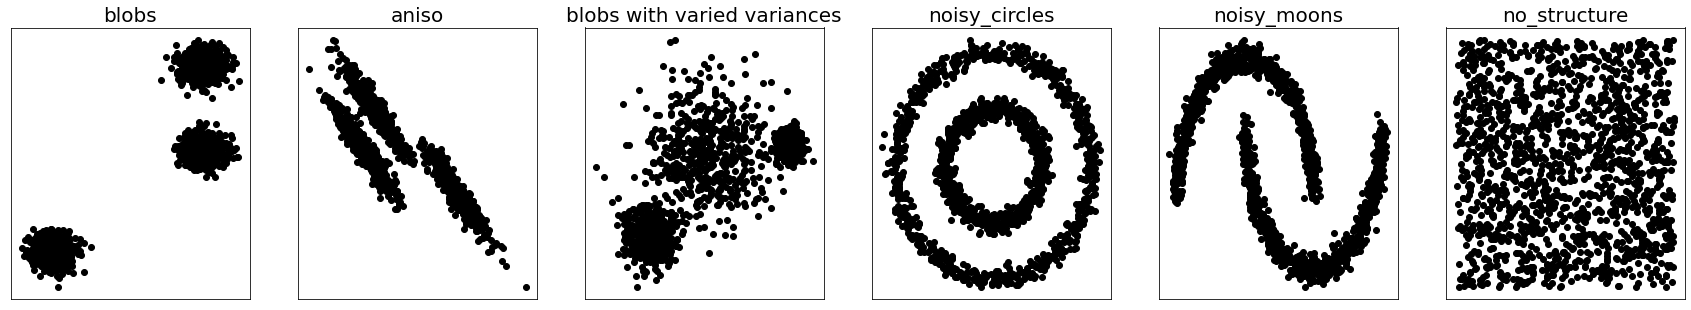

In [31]:
dataset_names=['blobs','aniso','blobs with varied variances','noisy_circles','noisy_moons','no_structure']
dataset_list = [
                blobs,
                aniso,
                varied,
                noisy_circles,
                noisy_moons,
                no_structure
                ]
plt.figure(figsize=(30,5))
for i,dataset in enumerate(dataset_list):
    i+=1
    X=dataset[0]
    plt.subplot(1,len(dataset_list),i) 
    plt.scatter(X[:, 0], X[:, 1],c='black')
    plt.title(str(dataset_names[i-1]),fontsize=20)
    plt.xticks(())
    plt.yticks(())
plt.show()

## K-means clustering

K-means clustering algorithm
    1- specify the number of clusters (K) to assign.
    2- randomly initiate k centroids
    3- repeat
        4- assing each point to its closest cetroid
        5- calculate the new centroid of each cluster
    6- until the centroid positions do not change

In [6]:
from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

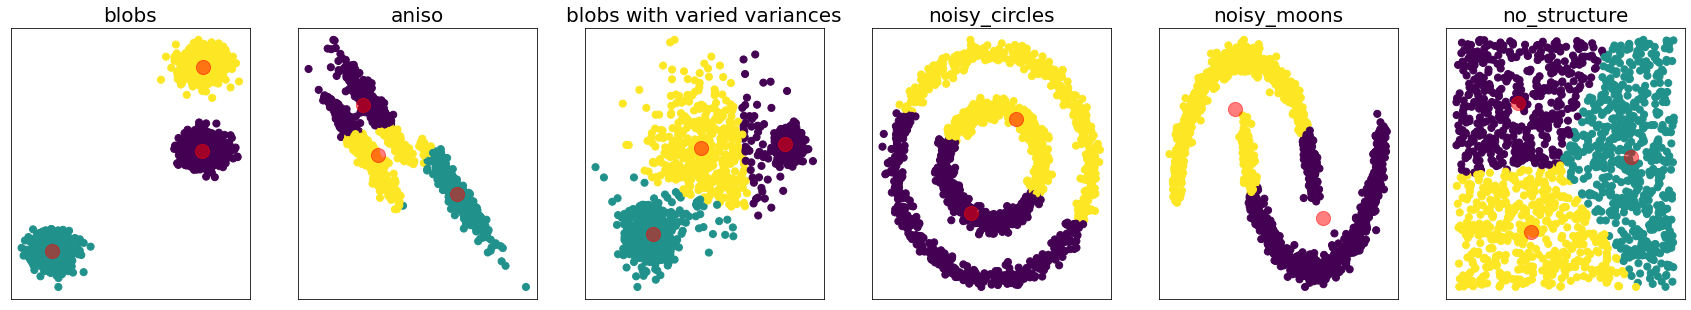

In [29]:
datasets_list = [
    (blobs, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

default_base = {'n_clusters': 3}

plt.figure(figsize=(30,5))
for i_dataset, (dataset, algo_params) in enumerate(datasets_list):
    params = default_base.copy()
    params.update(algo_params)
    
    X,y=dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    # Create cluster objects
    kmeans = KMeans(n_clusters=algo_params['n_clusters'],
                    init="random",
                    n_init=10,
                    max_iter=300,
                    random_state=42
                    )
    # Train clustering model
    kmeans.fit(X)
    centroids=kmeans.cluster_centers_[:, 1]
    plt.subplot(1,len(dataset_list),i_dataset+1) 
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], centroids, c='red', s=200, alpha=0.5)
    plt.title(str(dataset_names[i_dataset]),fontsize=20)
    plt.xticks(())
    plt.yticks(())
plt.show()


Observations:
    1- k-means is fast and simple
    2- the result depends on starting guesses (k, initial states of centroids)
    2- is limited to linear clustering boundaries
    3- performs well on clusters with Gaussian distribution, but faild if clusters have complex geometries!

## Hierarchical clustering

Agglomerative clustering is the bottom-up approach. It merges the two points that are the most similar until all points have been merged into a single cluster.

Divisive clustering is the top-down approach. It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain.

In [10]:
from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Comparing characteristics of different linkage methods for hierarchical clustering on 2D datasets :

 linkage method :  single


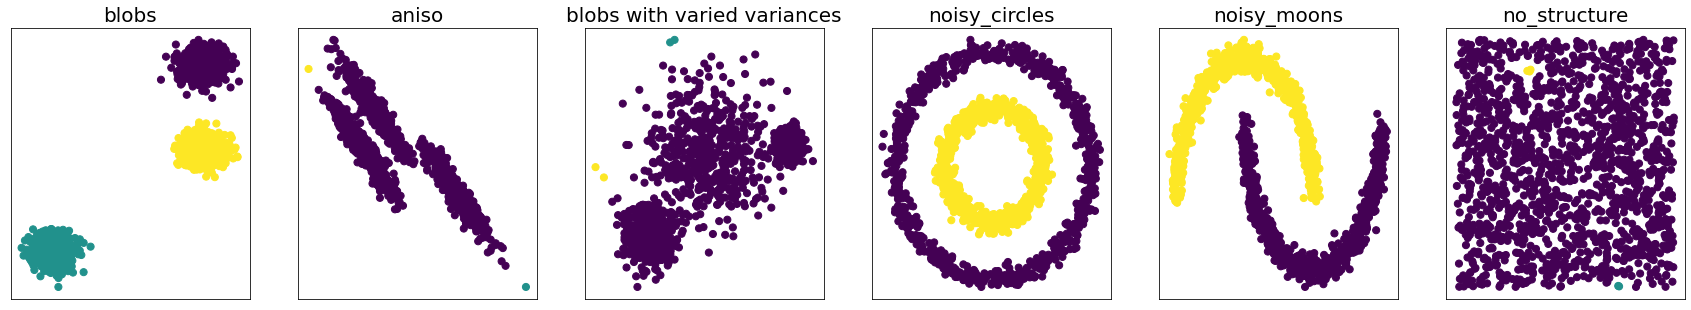


 linkage method :  complete


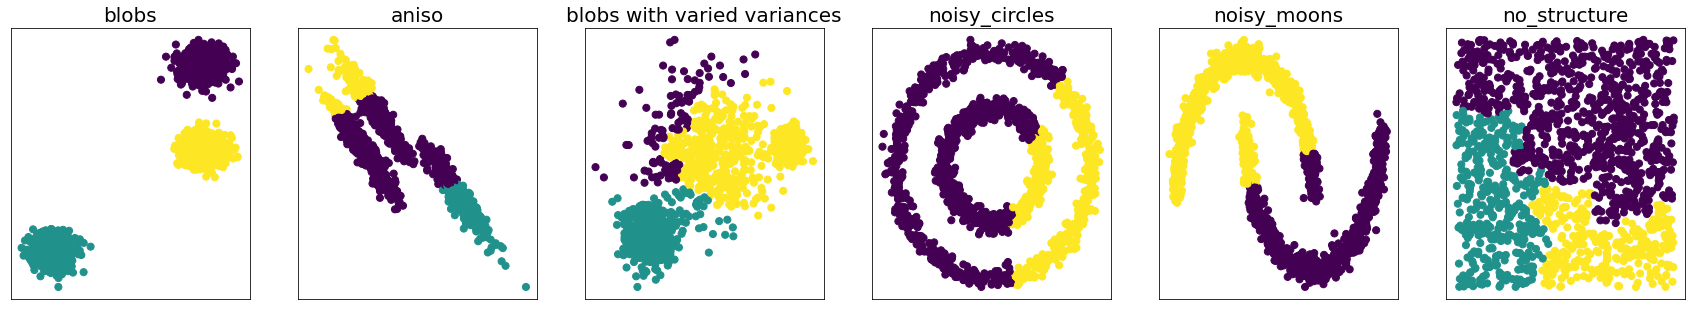


 linkage method :  average


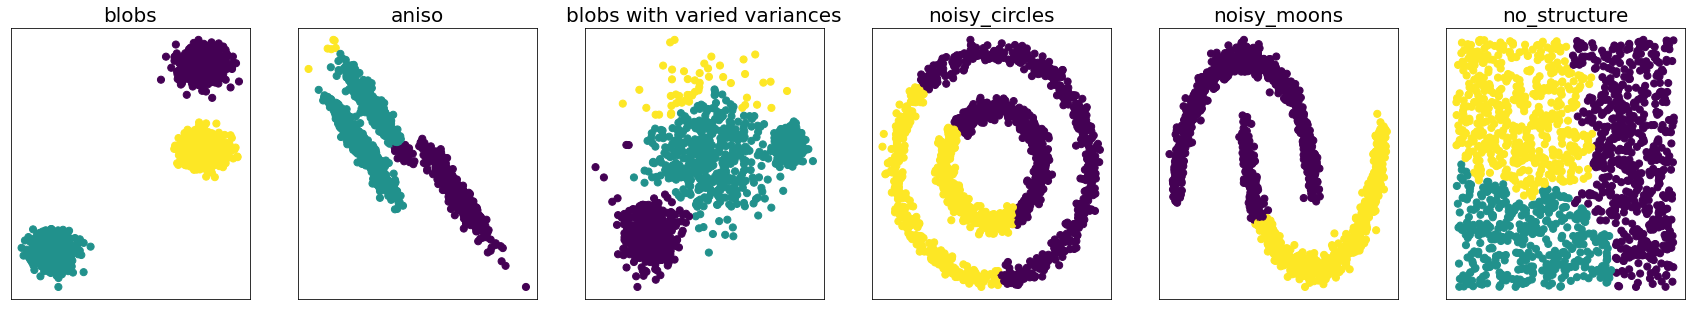


 linkage method :  ward


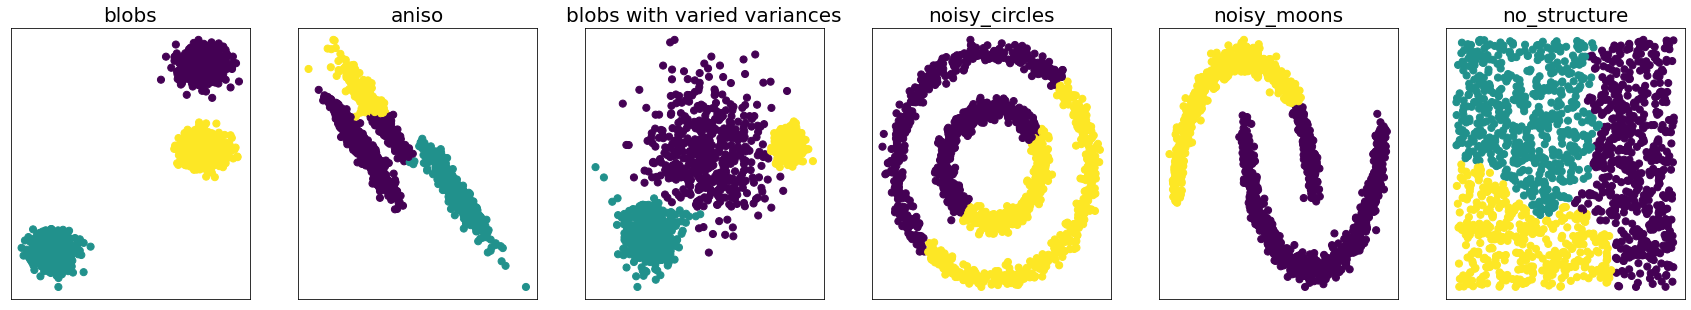

In [37]:
print ('Comparing characteristics of different linkage methods for hierarchical clustering on 2D datasets :')

datasets_list = [
    (blobs, {'n_clusters': 3}),
    (aniso, {'n_neighbors': 3}),
    (varied, {'n_neighbors': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

for i_linkage,linkage in enumerate(['single','complete','average','ward']):
    
    print('\n linkage method : ', linkage)
    plt.figure(figsize=(30,5))
    
    for i_dataset, (dataset, algo_params) in enumerate(datasets_list):
        # update parameters with dataset-specific values
        params = default_base.copy()
        params.update(algo_params)

        X,y=dataset

        # normalize dataset for easier parameter selection
        X = StandardScaler().fit_transform(X)

        # Create cluster objects
        algorithm = AgglomerativeClustering(
                        n_clusters=params['n_clusters'], linkage=linkage)

        # Train clustering model
        algorithm.fit(X)
        y_pred = algorithm.labels_.astype(int)

        plt.subplot(1,len(dataset_list),i_dataset+1) 
        plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
        plt.title(str(dataset_names[i_dataset]),fontsize=20)
        plt.xticks(())
        plt.yticks(())
    plt.show()

The main observations to make are:

single linkage is fast, and can perform well on non-globular data, but it performs poorly in the presence of noise.

average and complete linkage perform well on cleanly separated globular clusters, but have mixed results otherwise.

Ward is the most effective method for noisy data.



## Density based clustering

There are two inputs to DBSCAN:

esp: the search distance around point, and
minpts: the minimum number of points required to form a density cluster


In [19]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

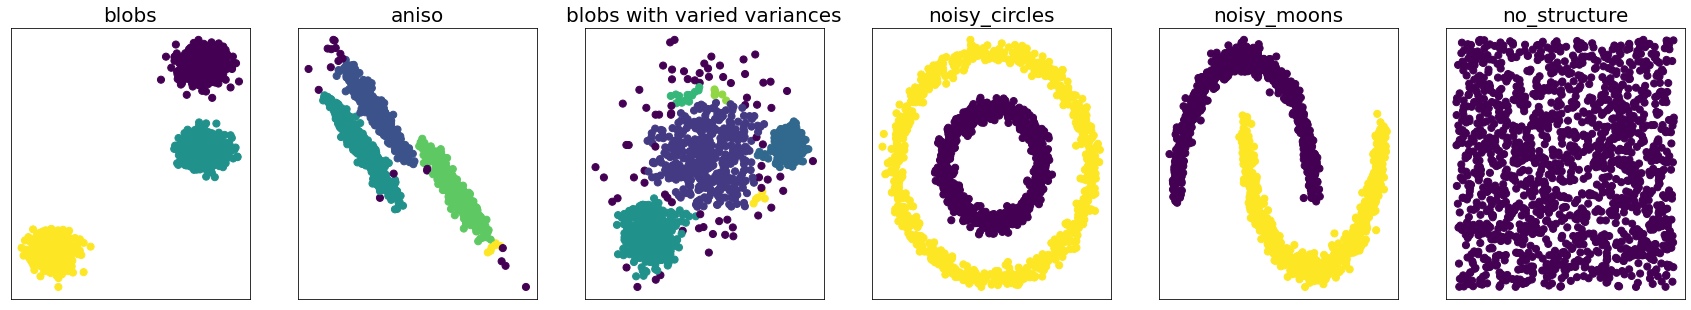

In [28]:
datasets_list = [
    (blobs, {}),
    (aniso, {'eps': .15}),
    (varied, {'eps': .15}),
    (noisy_circles, {}),
    (noisy_moons, {}),
    (no_structure, {})]

default_base = {'eps': .3}

plt.figure(figsize=(30,5))
for i_dataset, (dataset, algo_params) in enumerate(datasets_list):
    params = default_base.copy()
    params.update(algo_params)
    
    X,y=dataset
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    # Create cluster objects
    dbscan = cluster.DBSCAN(eps=params['eps'])
    
    # Train clustering model
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(int)
    
    plt.subplot(1,len(dataset_list),i_dataset+1) 
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
    plt.title(str(dataset_names[i_dataset]),fontsize=20)
    plt.xticks(())
    plt.yticks(())
plt.show()
